In [1]:
import spacy
import scispacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.linking import EntityLinker
from scispacy.hyponym_detector import HyponymDetector
import pandas as pd
from spacy import displacy
import deplacy
import networkx as nx
from spacy.matcher import Matcher
import matplotlib.pyplot as plt

In [11]:
with open ("/Users/abhinavshinow/Documents/GitHub/KG-Genaration-from-Biomedical-Text-Using-NER/Data_Collection/heart_basic-data.txt","r") as f:
    text=f.read().replace("\n\n"," ").replace("\n"," ")
text=text[:1000000]

In [12]:
len(text)

1000000

In [13]:
nlp=spacy.load("en_core_sci_sm")

In [14]:
nlp.add_pipe("abbreviation_detector")
nlp.add_pipe("hyponym_detector", last=True, config={"extended": False})
print(nlp.pipe_names)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner', 'abbreviation_detector', 'hyponym_detector']


In [15]:
doc=nlp(text)

In [17]:
#All the detected entities
Entities=[]
for ents in doc.ents:
    Entities.append(ents)

In [18]:
#All the abbreviations used in the doc
for abrv in doc._.abbreviations:
	print(str(abrv),str(abrv._.long_form))

CVD Cardiovascular diseases
CVD Cardiovascular diseases
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
bpm beats per minute
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
week week after the LMP
CO Cardiac output
CO Cardiac output
CO Cardiac output
CO Cardiac output
SV stroke volume
SV stroke volume
SV stroke volume
SV stroke volume
HR heart rate
HR heart rate
HR heart rate
HR 

In [19]:
for token in doc:
    print(token.text,token.dep_)

" punct
The det
heart nsubj
is cop
a det
muscular amod
organ ROOT
in case
most amod
animals nmod
, punct
which nsubj
pumps acl:relcl
blood dobj
through case
the det
blood compound
vessels nmod
of case
the det
circulatory amod
system nmod
. punct
The det
pumped amod
blood nsubj
carries ROOT
oxygen dobj
and cc
nutrients conj
to case
the det
body nmod
, punct
while mark
carrying advcl
metabolic amod
waste dobj
such case
as mwe
carbon compound
dioxide nmod
to case
the det
lungs nmod
. punct
In case
humans nmod
, punct
the det
heart nsubj
is cop
approximately advmod
the det
size ROOT
of case
a det
closed amod
fist nmod
and cc
is cop
located conj
between case
the det
lungs nmod
, punct
in case
the det
middle amod
compartment nmod
of case
the det
chest nmod
. punct
In case
humans nmod
, punct
other amod
mammals conj
, punct
and cc
birds conj
, punct
the det
heart nsubjpass
is auxpass
divided ROOT
into case
four nummod
chambers nmod
: punct
upper amod
left dep
and cc
right amod
atria conj
and 

In [ ]:
doc._.hearst_patterns

In [53]:
sentences=[]
for sents in doc.sents:
    sentences.append(str(sents))

In [54]:
sentences[4]

'Coronary artery disease, stroke, and peripheral artery disease involve atherosclerosis.'

In [57]:
related_entities=[]
relation=[]
for sent in sentences:
    related_entities.append(get_entities(sent))
    relation.append(get_relation(sent))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/scispacy/abbreviation.py:216: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)


In [84]:
df['relation'].value_counts()[:30]

used           159
include        125
found          119
associated      89
have            84
is              82
occurs          63
cause           56
has             52
occur           51
result          47
known           46
shown           46
recommended     45
considered      41
are             39
increases       36
lead            36
caused          36
performed       34
treated         32
estimated       32
involves        31
reported        30
present         30
%               28
common          28
increase        28
described       26
causes          25
Name: relation, dtype: int64

In [62]:
df=pd.DataFrame(related_entities,columns=['ent1','ent2'])
df['relation']=relation

In [63]:
df

ent1                               ent2  \
0                    diseases  that                      heart vessels   
1                               CVD           coronary artery diseases   
2                       Other  CVDs                             stroke   
3            underlying  mechanisms                                      
4           Coronary artery disease  peripheral artery atherosclerosis   
...                             ...                                ...   
6753                  oxidation  it                  unsaturated  fats   
6754  Pathophysiology Atherogenesis                                      
6755                             It                                      
6756                  slow  process                                      
6757             recent  hypothesis                     monocytes  the   

               relation  
0                 class  
1     includes coronary  
2               include  
3                  vary  
4               involve  
...                 ...  
6753               best  
6754            process  
6755      characterized  
6756          developed  
6757           suggests  

[6758 rows x 3 columns]

In [60]:
df.to_csv('Extracted-Entities.csv')

In [61]:
df = df.dropna(axis=0)

In [64]:
df

ent1                               ent2  \
0                    diseases  that                      heart vessels   
1                               CVD           coronary artery diseases   
2                       Other  CVDs                             stroke   
3            underlying  mechanisms                                      
4           Coronary artery disease  peripheral artery atherosclerosis   
...                             ...                                ...   
6753                  oxidation  it                  unsaturated  fats   
6754  Pathophysiology Atherogenesis                                      
6755                             It                                      
6756                  slow  process                                      
6757             recent  hypothesis                     monocytes  the   

               relation  
0                 class  
1     includes coronary  
2               include  
3                  vary  
4               involve  
...                 ...  
6753               best  
6754            process  
6755      characterized  
6756          developed  
6757           suggests  

[6758 rows x 3 columns]

In [69]:
G=nx.from_pandas_edgelist(df, "ent1", "ent2", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1821

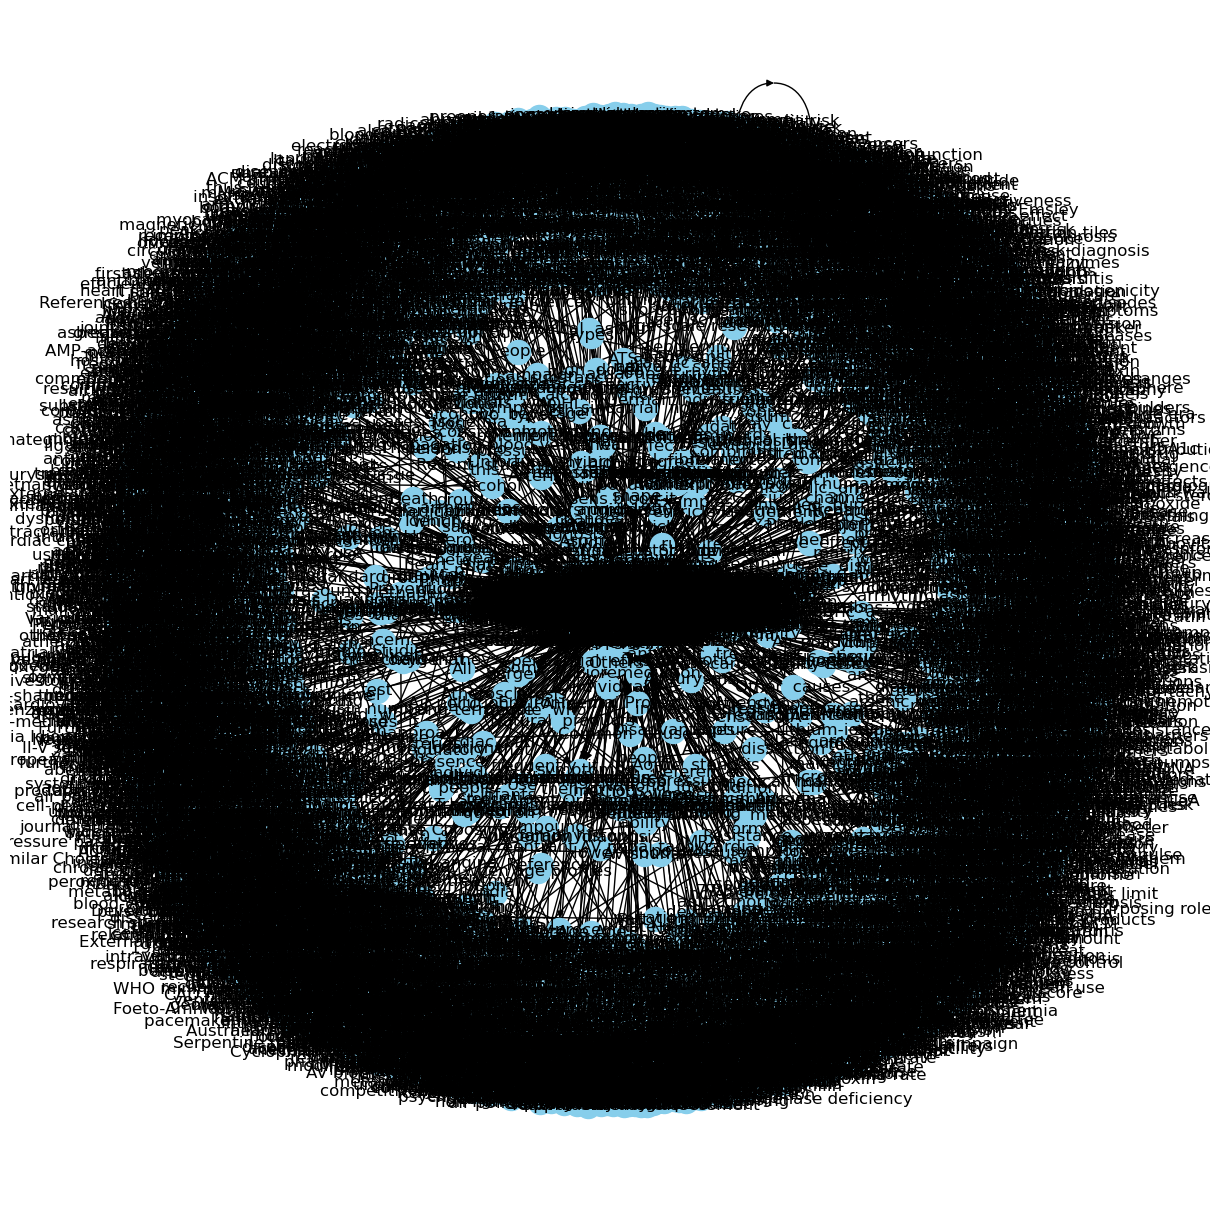

In [70]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

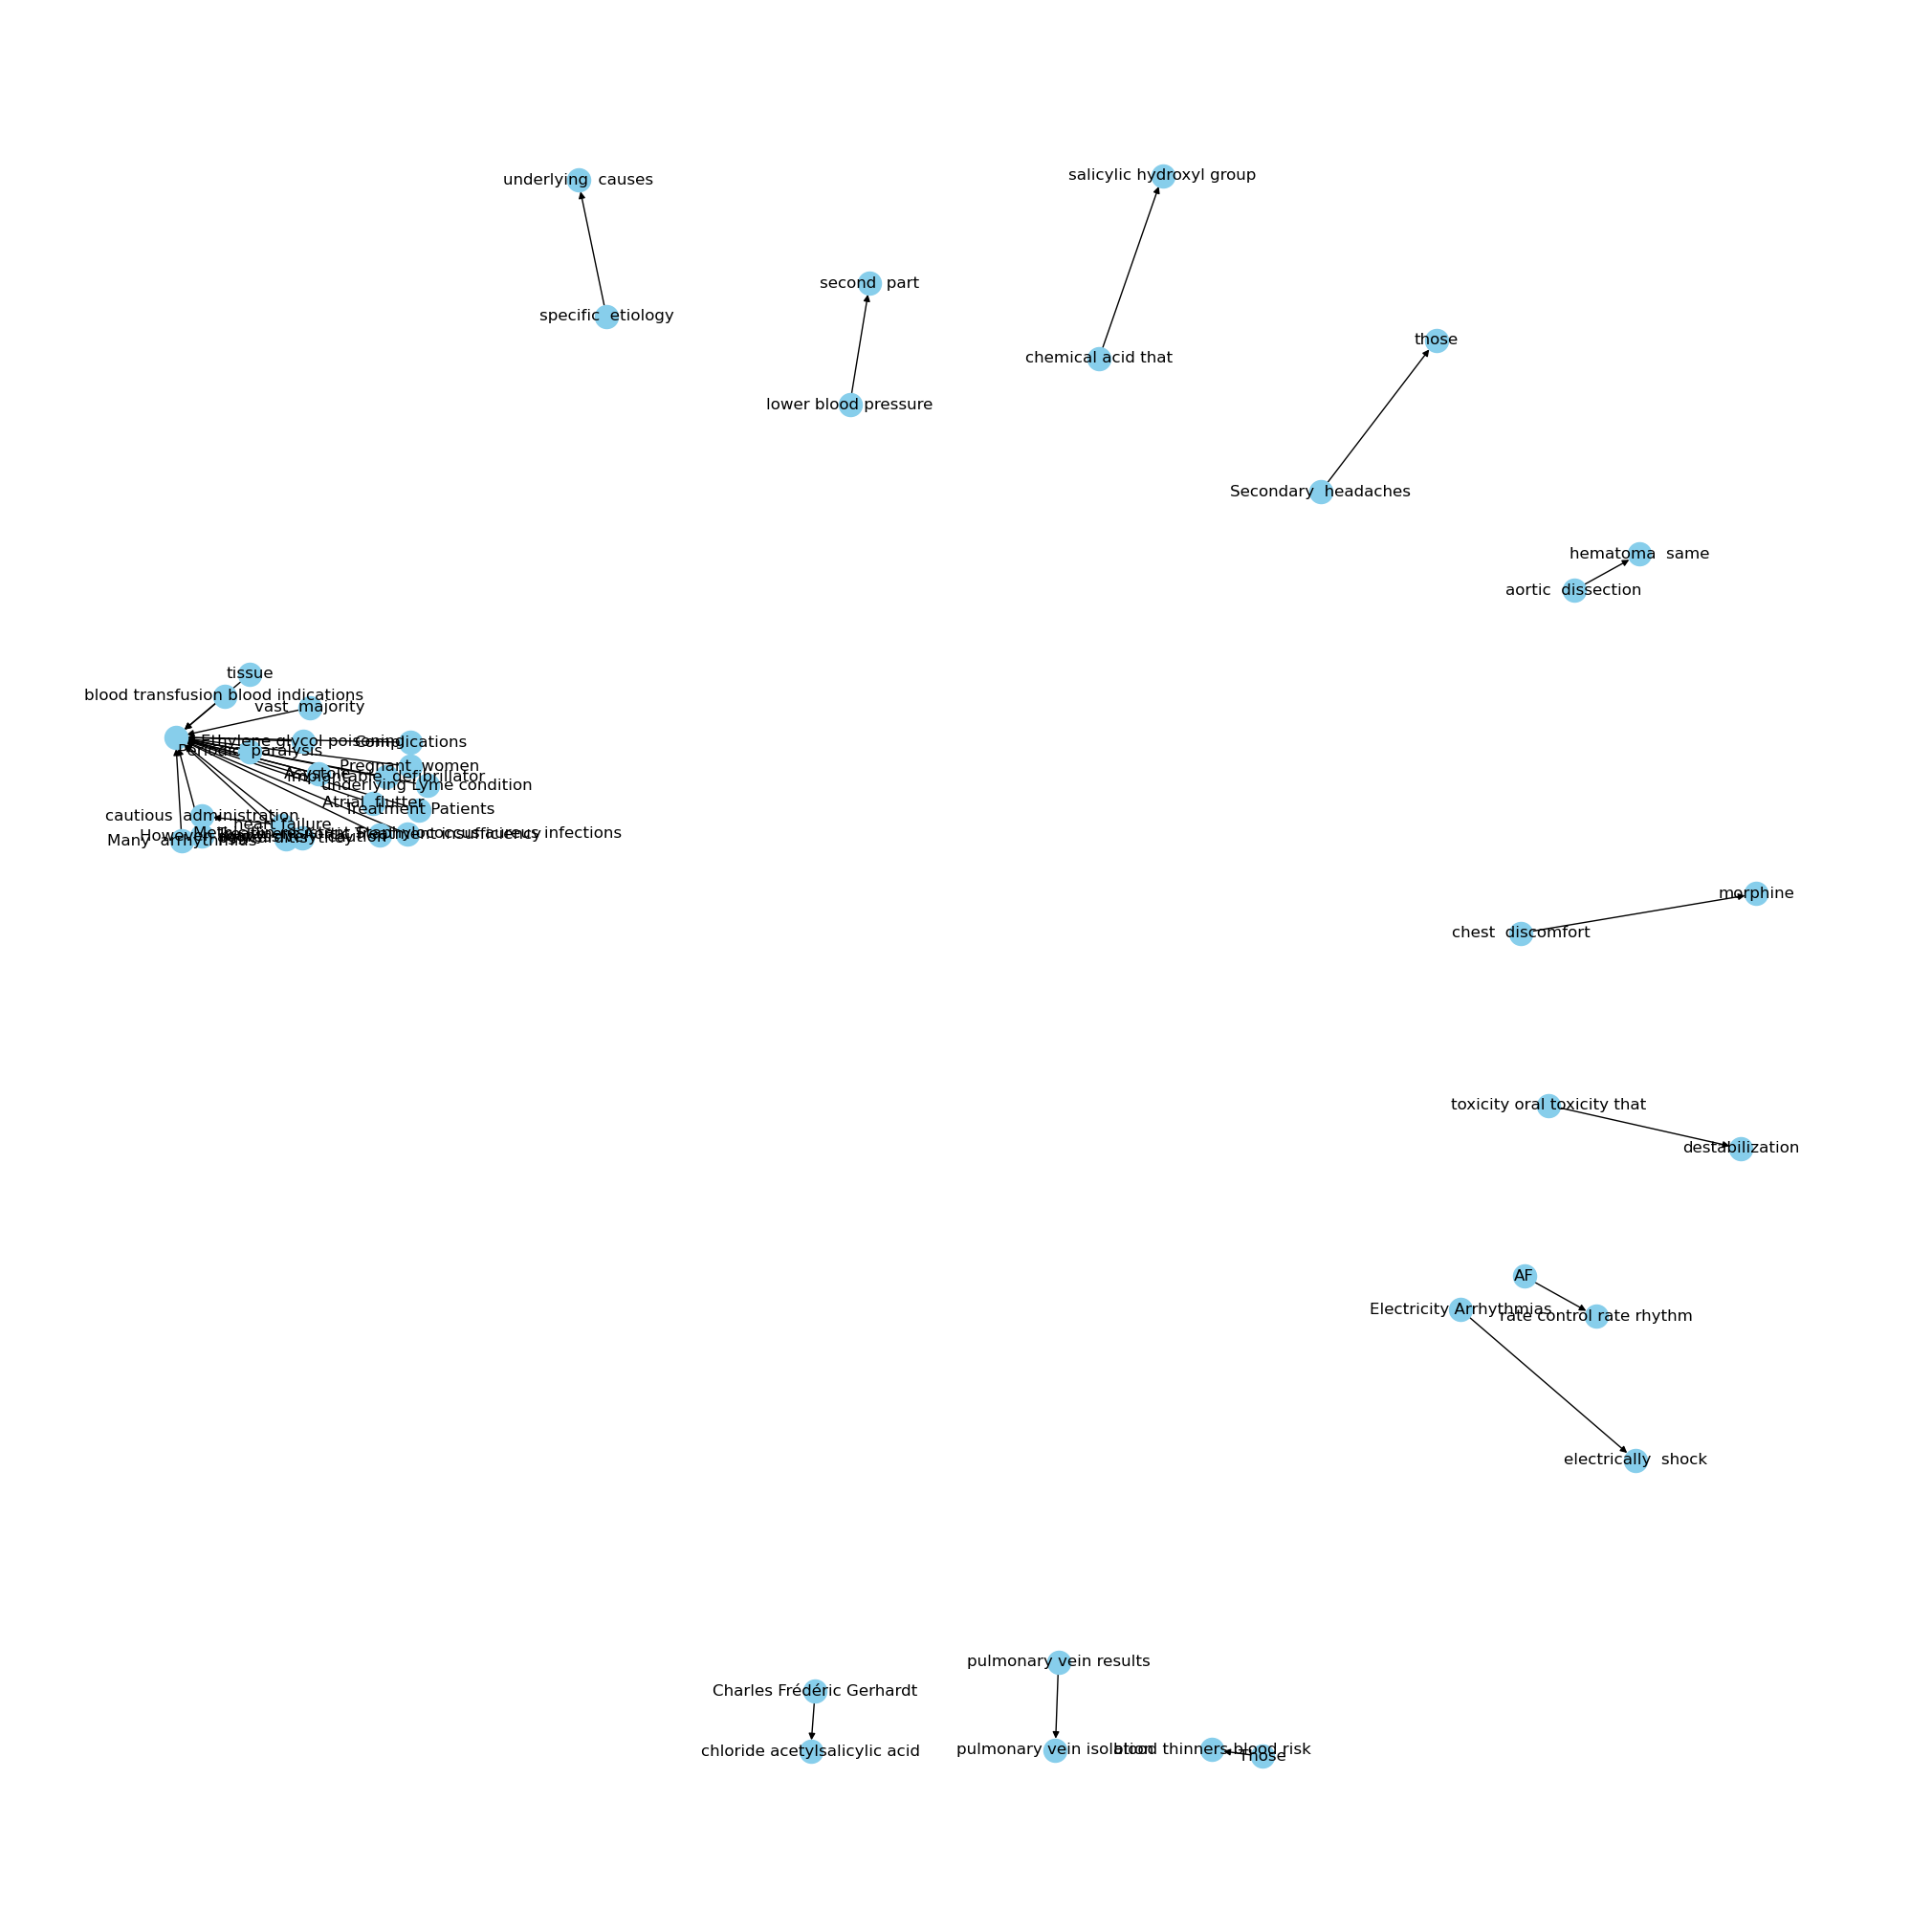

In [86]:
G_1=nx.from_pandas_edgelist(df[df['relation']=='treated'], "ent1", "ent2", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G_1)
nx.draw(G_1, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Reds, pos = pos)
plt.show()